## Lab 1 데이터의  전반적인  구조를  파악하기
데이터가 주어졌을 때 가장 먼저하는일은 데이터의 전반적인 구조를 파악하는 일이다.
- 어떤  변수(컬럼) 들이  있는가 ? 
- 몇  개의  행으로  구성되어  있는가 ? 
- 대략적인  통계량

## 전반적인  데이터  구조  파악을  위한  Pandas 함수
- head() : 데이터  앞  부분  출력 
- tail() : 데이터  뒷  부분  출력 
- shape : 행, 열  개수  출력 
- info() : 변수  속성  출력 
- describe() : 요약  통계량  출력

In [1]:
import pandas as pd

In [2]:
exam = pd.read_csv('exam.csv')

> head() - 데이터 앞 부분 확인 tail() - 데이터 뒷 부분 확인

In [3]:
exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [4]:
exam.head(10)

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


In [5]:
exam.tail()

,id,nclass,math,english,science
15,16,4,58,98,65
16,17,5,65,68,98
17,18,5,80,78,90
18,19,5,89,68,87
19,20,5,78,83,58


In [6]:
exam.tail(10)

,id,nclass,math,english,science
10,11,3,65,65,65
11,12,3,45,85,32
12,13,4,46,98,65
13,14,4,48,87,12
14,15,4,75,56,78
15,16,4,58,98,65
16,17,5,65,68,98
17,18,5,80,78,90
18,19,5,89,68,87
19,20,5,78,83,58


> shape - 데이터의 크기(행과 열의 구성)알아보기
> - shape는 데이터 프레임의 속성(attribute)임 / 함수가 아님

In [7]:
exam.shape # 행 20개 열 5개로 이루어짐

(20, 5)

> info() 변수 속성 파악하기

In [8]:
exam.columns

Index(['id', 'nclass', 'math', 'english', 'science'], dtype='object')

In [9]:
exam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   id       20 non-null     int64
 1   nclass   20 non-null     int64
 2   math     20 non-null     int64
 3   english  20 non-null     int64
 4   science  20 non-null     int64
dtypes: int64(5)
memory usage: 928.0 bytes


> describe() - 숫자 값을 갖는 각각의 컬럼에 대해 요약 통계량을 보여 줌
> - count : 값의  개수 
> - mean : 평균  값
> - std : 표준  편차 (각  값이  평균  값에서  떨어진  정도) 
> - min : 최소값
> - 25%, 50%, 75% : 하위 (25%, 50%, 75%) 지점에  위치한  값 
> - max : 최대값

In [11]:
exam.describe()

,id,nclass,math,english,science
count,20.00000,20.000000,20.000000,20.000000,20.000000
mean,10.50000,3.000000,57.450000,84.900000,59.450000
std,5.91608,1.450953,20.299015,12.875517,25.292968
min,1.00000,1.000000,20.000000,56.000000,12.000000
25%,5.75000,2.000000,45.750000,78.000000,45.000000
50%,10.50000,3.000000,54.000000,86.500000,62.500000
75%,15.25000,4.000000,75.750000,98.000000,78.000000
max,20.00000,5.000000,90.000000,98.000000,98.000000


## 요약  통계  해석해  보자
- 수학  점수  평균 : ( )점
- 수학  점수  최저점은 ( )점, 최고점은 ( )점
- 학생들의  수학점수는 54점을  중심으로 45.75점(25%)에서 75.75점(75%) 사이에  몰려있다.
- (57.45-20.299) ~ (57.45+20.299)에  약 68%가  분포되어  있음

## 데이터  특성  조금  더  알아보기
- scatterplot() : 변수  간  관계  표현하기(수학  성적과  과학  성적의  상관  관계가  있을까?) 
- boxplot() : 집단  간  분포  확인하기(반  별  수학  점수에  차이가  있을까?)

In [13]:
import seaborn as sns

<AxesSubplot:xlabel='math', ylabel='science'>

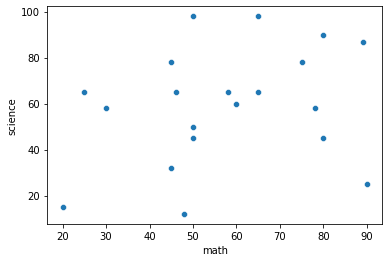

In [14]:
sns.scatterplot(data = exam, x='math', y='science')

<AxesSubplot:xlabel='nclass', ylabel='math'>

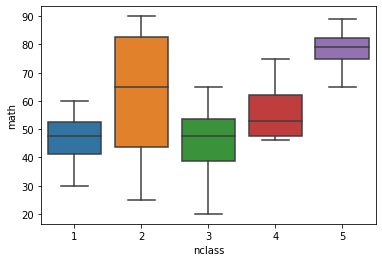

In [15]:
sns.boxplot(data = exam, x='nclass', y='math')

## Lab 2 : mpg 데이터  파악해  보기
- mpg(mile per gallon) 를  통해  데이터  파악해  보기
- 1999년 ~ 2008년까지  미국에서  출시된  자동차 234종의  정보를  담고  있음 
- bit.ly/easypy_51
- manufacturer : 제조사 
- model : 자동차  모델명 
- displ : 배기량(cc) 
- year : 생산  연도
- cyl : 실린더  수(4기통, 6기통, ...)
- trans : 변속기  종류 - 자동(auto)/수동(manual) 
- drv : 구동  방식 (전륜 f, 후륜 r, 4륜 4)
- cty : 도심  주행시  연비 (예: 18마일/갤런) 
- hwy : 고속도로  주행시  연비 (예: 18마일/갤런) 
- fl : 연료  종류(일반  가솔린 p, 고급  가솔린 r) 
- class : 자동차  크기(compact, suv, van, ...)

In [17]:
import pandas as pd
mpg = pd.read_csv('mpg.csv')

In [18]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [19]:
mpg.shape

(234, 11)

In [20]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [21]:
mpg.describe() # 숫자인 경우만 요약 통계량 출력

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


요약  데이터  분석(cty)
- (mean) 자동차가  도시에서  갤런당  평균 16.8마일  주행한다.
- (min/max) 도시  연비가  가장  낮은  모델은  갤런당 9마일, 가장  높은  모델은 35마일  주행한 
다.
- 도시  연비는  갤런당 17마일(50%)을  중심으로 14마일에서 19마일(25%, 75%) 사이에  몰 
려  있다

In [23]:
mpg.describe(include= 'all')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
count,234,234,234.000000,234.000000,234.000000,234,234,234.000000,234.000000,234,234
unique,15,38,NaN,NaN,NaN,10,3,NaN,NaN,5,7
top,dodge,caravan 2wd,NaN,NaN,NaN,auto(l4),f,NaN,NaN,r,suv
freq,37,11,NaN,NaN,NaN,83,106,NaN,NaN,168,62
mean,NaN,NaN,3.471795,2003.500000,5.888889,NaN,NaN,16.858974,23.440171,NaN,NaN
std,NaN,NaN,1.291959,4.509646,1.611534,NaN,NaN,4.255946,5.954643,NaN,NaN
min,NaN,NaN,1.600000,1999.000000,4.000000,NaN,NaN,9.000000,12.000000,NaN,NaN
25%,NaN,NaN,2.400000,1999.000000,4.000000,NaN,NaN,14.000000,18.000000,NaN,NaN
50%,NaN,NaN,3.300000,2003.500000,6.000000,NaN,NaN,17.000000,24.000000,NaN,NaN
75%,NaN,NaN,4.600000,2008.000000,8.000000,NaN,NaN,19.000000,27.000000,NaN,NaN


요약  데이터  분석(manufacturer)
- (unique) 자동차  제조사의  종류는 15개
- (top) 가장  많은  자동차  모델을  생산하는  제조회사는 dodge다 
- dodge는 37종의  모델을  생산한다

## Lab 3 : 컬럼(변수) 이름  바꾸기
- 수집한  데이터의  컬럼  이름을  분석하기  쉬운  이름으로  변경 
- df.rename(columns = {'old' : 'new' }

In [24]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [25]:
mpg_new = mpg.copy()
mpg_new.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [26]:
mpg_new = mpg_new.rename(columns={'hwy' : 'highway'})
mpg_new.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,highway,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [27]:
mpg_new = mpg_new.rename(columns={'cty' : 'city'})
mpg_new.head()

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


## Lab 4 : 파생  변수  만들기
- 변수(컬럼)을  조합하거나  함수를  이용하여  새로운  변수를  만들어  분석에  활용 
- 도로를  통틀어  어떤  자동차  모델의  연비가  높은  가를  분석하려고  한다. 
- 분석에  필요한  통합  연비  구하기 (통합  연비 = (도심연비 + 고속도로  연비) / 2)

In [28]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [30]:
mpg['total'] = (mpg['cty'] + mpg['hwy']) / 2

In [31]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


## Lab 5 : 조건문을  이용하여  파생  변수  만들기
- 자동차  통합  연비(total)를  기준으로  자동차  모델별로  합격  판정을  하려고  함 
- 합격의  기준이  되는  연비를  어떻게  정할까?

In [32]:
mpg['total'].describe()

count    234.000000
mean      20.149573
std        5.050290
min       10.500000
25%       15.500000
50%       20.500000
75%       23.500000
max       39.500000
Name: total, dtype: float64

## 자동차 연비 평균은 20.14마일/갤런

## 중앙값은 20.05마일/갤런

<AxesSubplot:ylabel='Frequency'>

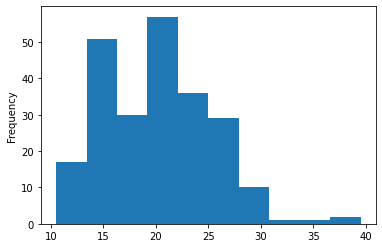

In [33]:
mpg['total'].plot.hist()

## 요약  통계량과  histogram을  통한  기초  분석
- (요약  통계량) total 연비의  평균과  중앙값이  약 20이다 
- (histogram) total 연비가 20~22.5 사이인  자동차  모델이  가장  많다 
- (통합) total 연비  대부분은 25이하이고, 25를  넘기는  것은  많지  않다

> 분석  결과를  바탕으로 20마일/갤런  이상인  자동차  모델에  대해  고연비  합격을 
주기로  결정

## 합격  판정  변수  만들기
- 고연비  합격  기준(20마일/갤런)을  적용하여  합격  판정  여부  변수  추가

In [34]:
import numpy as np

In [35]:
mpg['test'] = np.where(mpg['total'] >= 20, 'pass', 'fail')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,test
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,pass
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,pass
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,pass
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,pass
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,pass


## 빈도표로  합격  자동차  수  살펴보기
- df.value_counts() : 변수  값을  종류별로  값의  개수를  나타낸  표  만들기

In [36]:
mpg['test'].value_counts()

pass    128
fail    106
Name: test, dtype: int64

> 'pass' 판정은 128대, 'fail' 판정은 106대

In [37]:
count_test = mpg['test'].value_counts()
count_test

pass    128
fail    106
Name: test, dtype: int64

<AxesSubplot:>

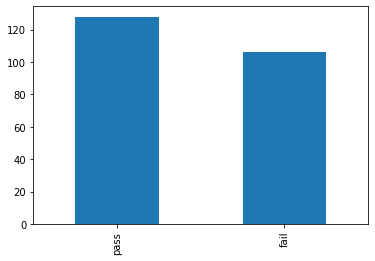

In [38]:
count_test.plot.bar()

<AxesSubplot:>

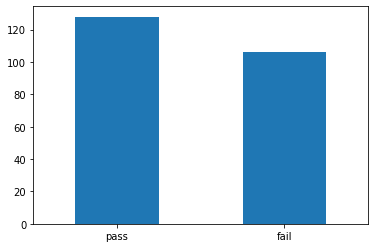

In [39]:
count_test.plot.bar(rot=0)

## Lab 6 : 중첩  조건문  만들기
- np.where() 안에 np.where()를  중첩하여  분류하기 
- 컬럼 total 연비를  기준에  따라 A, B, C 등급으로  분류
- 새로 분류 등급 변수(컬럼) grade를 만드러서 total 연비에 따른 등급값을 부여함

In [40]:
mpg['grade'] = np.where(mpg['total'] >= 30, 'A',
                np.where(mpg['total'] >= 20, 'B', 'C'))

> 빈도표와 막대 그래프로 연비 등급 살펴 보기

In [47]:
count_grade= mpg['grade'].value_counts()
count_grade

B    118
C    106
A     10
Name: grade, dtype: int64

<AxesSubplot:>

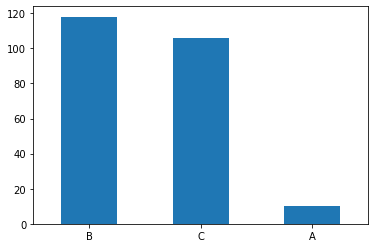

In [48]:
count_grade.plot.bar(rot=0)

> 알파벳 순서로 막대 정렬하기

In [49]:
count_grade = mpg['grade'].value_counts().sort_index()
count_grade

A     10
B    118
C    106
Name: grade, dtype: int64

<AxesSubplot:>

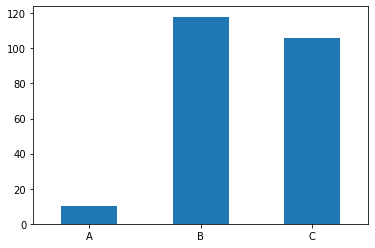

In [50]:
count_grade.plot.bar(rot=0)

## 연비에  따른  등급을  더  세분하여  분류해  볼까요?
- np.where() 안에 np.where()를  중첩하여  분류하기
- 컬럼 total 연비를  기준에  따라 A, B, C, D 등급으로  분류
- 새로  분류  등급  변수(컬럼) grade2를  만드러서 total 연비에  따른  등급값을  부여함

In [51]:
mpg['grade2'] = np.where(mpg['total'] >= 30, 'A',
                np.where(mpg['total'] >= 25, 'B',
                np.where(mpg['total'] >= 20, 'C', 'D')))

In [52]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,test,grade,grade2
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,pass,B,C
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,pass,B,B
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,pass,B,B
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,pass,B,B
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,pass,B,C


## 목록에  해당하는  행으로  변수  만들기
- 변수(컬럼) class의  자동차  등급을  확인하고
- class가 'compact', 'subcompact', '2seater'는 small, 나머지  차량은 large로  분류하여 'size' 
변수(컬럼)으로  추가

> 차량 class 값 확인 하기

In [53]:
mpg['category'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 234 entries, 0 to 233
Series name: category
Non-Null Count  Dtype 
--------------  ----- 
234 non-null    object
dtypes: object(1)
memory usage: 2.0+ KB


In [54]:
mpg['category'].value_counts()

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: category, dtype: int64

In [59]:
mpg['size'] =     np. where((mpg['category'] == 'compact') |
(mpg['category'] == 'subcompact') |
(mpg['category'] == '2seater'), 'small', 'large')
mpg. head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,test,grade,grade2,size
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,pass,B,C,small
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,pass,B,B,small
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,pass,B,B,small
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,pass,B,B,small
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,pass,B,C,small


In [60]:
mpg['size'].value_counts()

large    147
small     87
Name: size, dtype: int64

## Lab 7: 분석  도전
- midwest.csv는  미국  동북중부(East North Central States) 437개  지역의  인구  통계  정보를 
담고  있음
- 지역별  아시아계  인구  비율이  높은  지역을  알아보려고  함 
- bit.ly/easypy_52

> 데이터를  불러와서  데이터  특징을  파악하시오
> 1. 'midwest.csv'를 midwest 데이터  프레임으로  읽어오기 (midwest = pd.read_csv('midwest.csv'))
> 2. midwest 데이터의  행과  열의  갯수  파악 (midwest.shape)
> 3. 컬럼(변수)의  이름과  변수의  타입  등  파악 (midwest.info()) 
> - poptotal : 해당  지역(state/county)의  총  인구  수
> - popasian : 해당  지역(state/county)의  아시아계  인구  수

In [61]:
midwest = pd.read_csv('midwest.csv')

In [62]:
midwest.head()

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,19.631392,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,11.243308,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,17.033819,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,17.278954,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,14.475999,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR


In [63]:
midwest.shape

(437, 28)

In [64]:
midwest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PID                   437 non-null    int64  
 1   county                437 non-null    object 
 2   state                 437 non-null    object 
 3   area                  437 non-null    float64
 4   poptotal              437 non-null    int64  
 5   popdensity            437 non-null    float64
 6   popwhite              437 non-null    int64  
 7   popblack              437 non-null    int64  
 8   popamerindian         437 non-null    int64  
 9   popasian              437 non-null    int64  
 10  popother              437 non-null    int64  
 11  percwhite             437 non-null    float64
 12  percblack             437 non-null    float64
 13  percamerindan         437 non-null    float64
 14  percasian             437 non-null    float64
 15  percother             4

> poptotal(전체 인구) 변수를 total로, popasian(아시아 계 인구수) 변수를 asian으로 수정하시오

In [65]:
midwest = midwest.rename(columns={'poptotal' : 'total'})

In [66]:
midwest = midwest.rename(columns={'popasian' : 'asian'})

In [67]:
midwest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PID                   437 non-null    int64  
 1   county                437 non-null    object 
 2   state                 437 non-null    object 
 3   area                  437 non-null    float64
 4   total                 437 non-null    int64  
 5   popdensity            437 non-null    float64
 6   popwhite              437 non-null    int64  
 7   popblack              437 non-null    int64  
 8   popamerindian         437 non-null    int64  
 9   asian                 437 non-null    int64  
 10  popother              437 non-null    int64  
 11  percwhite             437 non-null    float64
 12  percblack             437 non-null    float64
 13  percamerindan         437 non-null    float64
 14  percasian             437 non-null    float64
 15  percother             4

> total, asin 변수를  활용하여 '전체  인구  대비  안시아  인구  백분율'을  구하여  변 
수 rate를  저장하고  히스토  그램으로  분포  살펴보기

In [68]:
midwest['rate'] = (midwest['asian'] / midwest['total']) * 100

In [69]:
midwest.head()

,PID,county,state,area,total,popdensity,popwhite,popblack,popamerindian,asian,...,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,rate
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR,0.376759
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR,0.451722
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR,0.106731
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU,0.486918
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR,0.085675


In [70]:
midwest[['county', 'state', 'total', 'asian', 'rate']]. head(11)

,county,state,total,asian,rate
0,ADAMS,IL,66090,249,0.376759
1,ALEXANDER,IL,10626,48,0.451722
2,BOND,IL,14991,16,0.106731
3,BOONE,IL,30806,150,0.486918
4,BROWN,IL,5836,5,0.085675
5,BUREAU,IL,35688,195,0.546402
6,CALHOUN,IL,5322,15,0.281849
7,CARROLL,IL,16805,61,0.362987
8,CASS,IL,13437,23,0.171169
9,CHAMPAIGN,IL,173025,8033,4.642682


<AxesSubplot:ylabel='Frequency'>

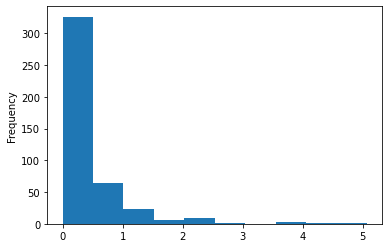

In [71]:
midwest['rate']. plot. hist()

In [72]:
midwest['rate']. describe()

count    437.000000
mean       0.487246
std        0.627856
min        0.000000
25%        0.173739
50%        0.297170
75%        0.521161
max        5.070452
Name: rate, dtype: float64

> 아시안  인구  전체  백분율을  구하고  평균을  초과하면 'large' 그  외에는 'small'을 
부여하는  변수 group 생성

In [73]:
midwest['rate'].mean()

0.48724618343573406

In [74]:
midwest['group'] = np. where(midwest['rate'] > 0.4872, 'large', 'small') # 평균 값

In [75]:
midwest['group'].value_counts()

small    318
large    119
Name: group, dtype: int64

> 'large'와 'small' 해당  지역이  얼마나  많은지  빈도표와  막대  그래프를  만드시오

<AxesSubplot:>

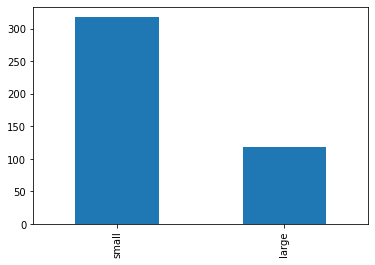

In [77]:
count_group = midwest['group']. value_counts()
count_group. plot. bar()